# Beginning of the Code

In [ ]:

# %tensorflow_version 1.x
# the original simulations were run using tensorflow 1.x, but now Colab only supports tensorflow 2.x so some of the code has been updated

!pip install 'h5py<3.0.0'
import h5py

import keras
import tensorflow as tf
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape

import matplotlib.pyplot as plt

import imageio

from PIL import Image, ImageDraw, ImageFilter

from numpy.random import default_rng
rng = default_rng()



from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 27.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h5py: filename=h5py-2.10.0-cp310-cp310-linux_x86_64.whl size=5619701 sha256=5d6c11536cd74105a63c48fbbce6d0309fc5e121cb8e77868494411dd3e164b5
  Stored in directory: /root/.cache/pip/wheels/21/bc/58/0d0c6056e1339f40188d136cd838c6554d9c17545196dd9110
Successfully built h5py
  Attempting uninstall: h5py
    Found existing installation: h5py 3.8.0
    Uninstalling h5py-3.8.0:
      Successfully uninstalled h5py-3.8.0
Mounted at /content/gdrive
/content/gdrive/My Drive


# Preparing Data

In [ ]:

(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()

data_train = data_train.reshape(60000, 28, 28)
data_test = data_test.reshape(10000, 28, 28)

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:

data_train_0 = []
data_train_1 = []
data_train_2 = []
data_train_3 = []


for i in range(600):
  if labels_train[i] == 0:
    data_train_0.append(data_train[i,:,:])
  if labels_train[i] == 1:
    data_train_1.append(data_train[i,:,:])
  if labels_train[i] == 5:
    data_train_2.append(data_train[i,:,:])
  if labels_train[i] == 7:
    data_train_3.append(data_train[i,:,:])




data_train_0 = np.asarray(data_train_0)
data_train_1 = np.asarray(data_train_1)
data_train_2 = np.asarray(data_train_2)
data_train_3 = np.asarray(data_train_3)

In [ ]:

data_size = 600

num_train = 400
num_valid = 100
num_test = 100


## Without Gaussian Noise:

In [ ]:

img = np.zeros([140,140],dtype=np.uint8)
img.fill(0)


img = img

imageio.imwrite('Two_visual_pathways_modeling/img.jpg', img)
img = Image.open('Two_visual_pathways_modeling/img.jpg')

data_train_organized = np.zeros((300,140,140))
data_train_organized_center_orientation = np.zeros(300)

j = 0
num_image = 0

labels = np.zeros(300)

for i in range(300):

  k0 = rng.choice(62, size=1, replace=False)
  data_0 = data_train_0[k0,:,:].reshape(28,28)
  data_0 = data_0.astype(np.uint8)
  k1 = rng.choice(66, size=1, replace=False)
  data_1 = data_train_1[k1,:,:].reshape(28,28)
  data_1 = data_1.astype(np.uint8)


  select = rng.choice(2, size=1, replace=False)

  if select == 0:
    k2 = rng.choice(58, size=1, replace=False)

    data_2 = data_train_2[k2,:,:].reshape(28,28)
    data_2 = data_2.astype(np.uint8)
    labels[i] = 0

  if select == 1:
    k2 = rng.choice(61, size=1, replace=False)

    data_2 = data_train_3[k2,:,:].reshape(28,28)
    data_2 = data_2.astype(np.uint8)
    labels[i] = 1


  imageio.imwrite('Two_visual_pathways_modeling/data_0.jpg', data_0)
  data_0 = Image.open('Two_visual_pathways_modeling/data_0.jpg')
  imageio.imwrite('Two_visual_pathways_modeling/data_1.jpg', data_1)
  data_1 = Image.open('Two_visual_pathways_modeling/data_1.jpg')
  imageio.imwrite('Two_visual_pathways_modeling/data_2.jpg', data_2)
  data_2 = Image.open('Two_visual_pathways_modeling/data_2.jpg')


  ii = rng.choice(36, size=1, replace=False)

  data_train_organized_center_orientation[i] = ii

  back_im = img.copy()

  ii = ii[0]

  if ii < 9:
    if (ii%9) < 3:
      x_pos = 28+(ii%3)*28
      back_im.paste(data_0,(x_pos,0))
      back_im.paste(data_1,(x_pos,28))
      back_im.paste(data_2,(x_pos,56))
    elif (ii%9) >= 3 and (ii%9) < 6:
      back_im.paste(data_0,(x_pos,28))
      back_im.paste(data_1,(x_pos,56))
      back_im.paste(data_2,(x_pos,84))
    elif (ii%9) >= 6:
      back_im.paste(data_0,(x_pos,56))
      back_im.paste(data_1,(x_pos,84))
      back_im.paste(data_2,(x_pos,112))

  elif ii >= 9 and ii < 18:
    ii = ii - 9
    data_0 = data_0.rotate(90)
    data_1 = data_1.rotate(90)
    data_2 = data_2.rotate(90)

    x_pos_0 = 0 + (ii%3)*28
    x_pos_1 = 28 + (ii%3)*28
    x_pos_2 = 56 + (ii%3)*28

    if (ii%9) < 3:
      back_im.paste(data_0,(x_pos_0,28))
      back_im.paste(data_1,(x_pos_1,28))
      back_im.paste(data_2,(x_pos_2,28))
    elif (ii%9) >= 3 and (ii%9) < 6:
      back_im.paste(data_0,(x_pos_0,56))
      back_im.paste(data_1,(x_pos_1,56))
      back_im.paste(data_2,(x_pos_2,56))
    elif (ii%9) >= 6:
      back_im.paste(data_0,(x_pos_0,84))
      back_im.paste(data_1,(x_pos_1,84))
      back_im.paste(data_2,(x_pos_2,84))

  elif ii >= 18 and ii < 27:
    ii = ii - 18
    data_0 = data_0.rotate(180)
    data_1 = data_1.rotate(180)
    data_2 = data_2.rotate(180)

    x_pos = 28+(ii%3)*28

    if (ii%9) < 3:
      back_im.paste(data_0,(x_pos,56))
      back_im.paste(data_1,(x_pos,28))
      back_im.paste(data_2,(x_pos,0))
    elif (ii%9) >= 3 and (ii%9) < 6:
      back_im.paste(data_0,(x_pos,84))
      back_im.paste(data_1,(x_pos,56))
      back_im.paste(data_2,(x_pos,28))
    elif (ii%9) >= 6:
      back_im.paste(data_0,(x_pos,112))
      back_im.paste(data_1,(x_pos,84))
      back_im.paste(data_2,(x_pos,56))

  elif ii >= 27:
    ii = ii - 27
    data_0 = data_0.rotate(270)
    data_1 = data_1.rotate(270)
    data_2 = data_2.rotate(270)

    x_pos_0 = 56 + (ii%3)*28
    x_pos_1 = 28 + (ii%3)*28
    x_pos_2 = 0 + (ii%3)*28

    if (ii%9) < 3:
      back_im.paste(data_0,(x_pos_0,28))
      back_im.paste(data_1,(x_pos_1,28))
      back_im.paste(data_2,(x_pos_2,28))
    elif (ii%9) >= 3 and (ii%9) < 6:
      back_im.paste(data_0,(x_pos_0,56))
      back_im.paste(data_1,(x_pos_1,56))
      back_im.paste(data_2,(x_pos_2,56))
    elif (ii%9) >= 6:
      back_im.paste(data_0,(x_pos_0,84))
      back_im.paste(data_1,(x_pos_1,84))
      back_im.paste(data_2,(x_pos_2,84))


  data_train_organized[i,:,:] = np.asarray(back_im) # unscrambled images


In [ ]:
img = np.zeros([140,140],dtype=np.uint8)
img.fill(0)

img = img

imageio.imwrite('Two_visual_pathways_modeling/img.jpg', img)
img = Image.open('Two_visual_pathways_modeling/img.jpg')

data_train_scrambled = np.zeros((300,140,140))
data_train_scrambled_center_orientation = np.zeros(300)

j = 0
num_image = 0

labels2 = np.zeros(300)

for i in range(300):

  k0 = rng.choice(62, size=1, replace=False)
  data_0 = data_train_0[k0,:,:].reshape(28,28)
  data_0 = data_0.astype(np.uint8)
  k1 = rng.choice(66, size=1, replace=False)
  data_1 = data_train_1[k1,:,:].reshape(28,28)
  data_1 = data_1.astype(np.uint8)

  select = rng.choice(2, size=1, replace=False)

  if select == 0:
    k2 = rng.choice(58, size=1, replace=False)

    data_2 = data_train_2[k2,:,:].reshape(28,28)
    data_2 = data_2.astype(np.uint8)
    labels2[i] = 0

  if select == 1:
    k2 = rng.choice(61, size=1, replace=False)

    data_2 = data_train_3[k2,:,:].reshape(28,28)
    data_2 = data_2.astype(np.uint8)
    labels2[i] = 1

  imageio.imwrite('Two_visual_pathways_modeling/data_0.jpg', data_0)
  data_0 = Image.open('Two_visual_pathways_modeling/data_0.jpg')
  imageio.imwrite('Two_visual_pathways_modeling/data_1.jpg', data_1)
  data_1 = Image.open('Two_visual_pathways_modeling/data_1.jpg')
  imageio.imwrite('Two_visual_pathways_modeling/data_2.jpg', data_2)
  data_2 = Image.open('Two_visual_pathways_modeling/data_2.jpg')


  ii = rng.choice(36, size=1, replace=False)

  data_train_scrambled_center_orientation[i] = ii

  back_im = img.copy()

  switch = rng.choice(5, size=1, replace=False)

  data_0_prime = data_0
  data_1_prime = data_1
  data_2_prime = data_2

  if switch == 0:
      data0 = data_1_prime
      data1 = data_0_prime
      data2 = data_2_prime

  if switch == 1:
      data0 = data_2_prime
      data1 = data_1_prime
      data2 = data_0_prime

  if switch == 2:
      data0 = data_0_prime
      data1 = data_2_prime
      data2 = data_1_prime

  if switch == 3:
      data0 = data_1_prime
      data1 = data_2_prime
      data2 = data_0_prime

  if switch == 4:
      data0 = data_2_prime
      data1 = data_0_prime
      data2 = data_1_prime

  ii = ii[0]

  if ii < 9:
    if (ii%9) < 3:
      back_im.paste(data0,(28+(ii%3)*28,0))
      back_im.paste(data1,(28+(ii%3)*28,28))
      back_im.paste(data2,(28+(ii%3)*28,56))
    elif (ii%9) >= 3 and (ii%9) < 6:
      back_im.paste(data0,(28+(ii%3)*28,28))
      back_im.paste(data1,(28+(ii%3)*28,56))
      back_im.paste(data2,(28+(ii%3)*28,84))
    elif (ii%9) >= 6:
      back_im.paste(data0,(28+(ii%3)*28,56))
      back_im.paste(data1,(28+(ii%3)*28,84))
      back_im.paste(data2,(28+(ii%3)*28,112))

  elif ii >= 9 and ii < 18:
    ii = ii - 9
    data0 = data0.rotate(90)
    data1 = data1.rotate(90)
    data2 = data2.rotate(90)
    if (ii%9) < 3:
      back_im.paste(data0,(0+(ii%3)*28,28))
      back_im.paste(data1,(28+(ii%3)*28,28))
      back_im.paste(data2,(56+(ii%3)*28,28))
    elif (ii%9) >= 3 and (ii%9) < 6:
      back_im.paste(data0,(0+(ii%3)*28,56))
      back_im.paste(data1,(28+(ii%3)*28,56))
      back_im.paste(data2,(56+(ii%3)*28,56))
    elif (ii%9) >= 6:
      back_im.paste(data0,(0+(ii%3)*28,84))
      back_im.paste(data1,(28+(ii%3)*28,84))
      back_im.paste(data2,(56+(ii%3)*28,84))

  elif ii >= 18 and ii < 27:
    ii = ii - 18
    data0 = data0.rotate(180)
    data1 = data1.rotate(180)
    data2 = data2.rotate(180)
    if (ii%9) < 3:
      back_im.paste(data0,(28+(ii%3)*28,56))
      back_im.paste(data1,(28+(ii%3)*28,28))
      back_im.paste(data2,(28+(ii%3)*28,0))
    elif (ii%9) >= 3 and (ii%9) < 6:
      back_im.paste(data0,(28+(ii%3)*28,84))
      back_im.paste(data1,(28+(ii%3)*28,56))
      back_im.paste(data2,(28+(ii%3)*28,28))
    elif (ii%9) >= 6:
      back_im.paste(data0,(28+(ii%3)*28,112))
      back_im.paste(data1,(28+(ii%3)*28,84))
      back_im.paste(data2,(28+(ii%3)*28,56))

  elif ii >= 27:
    ii = ii - 27
    data0 = data0.rotate(270)
    data1 = data1.rotate(270)
    data2 = data2.rotate(270)
    if (ii%9) < 3:
      back_im.paste(data0,(56+(ii%3)*28,28))
      back_im.paste(data1,(28+(ii%3)*28,28))
      back_im.paste(data2,(0+(ii%3)*28,28))
    elif (ii%9) >= 3 and (ii%9) < 6:
      back_im.paste(data0,(56+(ii%3)*28,56))
      back_im.paste(data1,(28+(ii%3)*28,56))
      back_im.paste(data2,(0+(ii%3)*28,56))
    elif (ii%9) >= 6:
      back_im.paste(data0,(56+(ii%3)*28,84))
      back_im.paste(data1,(28+(ii%3)*28,84))
      back_im.paste(data2,(0+(ii%3)*28,84))

  data_train_scrambled[i,:,:] = np.asarray(back_im)



## With Gaussian Noise:

In [ ]:
'''
img = np.zeros([140,140],dtype=np.uint8)
img.fill(0)

gaussian = np.random.normal(256/2, 256/4, (img.shape[0],img.shape[1]))
img = img + gaussian



imageio.imwrite('Two_visual_pathways_modeling/img.jpg', img)
img = Image.open('Two_visual_pathways_modeling/img.jpg')

data_train_organized = np.zeros((300,140,140))
data_train_organized_center_orientation = np.zeros(300)

j = 0
num_image = 0

labels = np.zeros(300)

for i in range(300):

  k0 = rng.choice(62, size=1, replace=False)
  data_0 = data_train_0[k0,:,:].reshape(28,28)
  data_0 = data_0.astype(np.uint8)
  k1 = rng.choice(66, size=1, replace=False)
  data_1 = data_train_1[k1,:,:].reshape(28,28)
  data_1 = data_1.astype(np.uint8)

  select = rng.choice(2, size=1, replace=False)

  if select == 0:
    k2 = rng.choice(58, size=1, replace=False)

    data_2 = data_train_2[k2,:,:].reshape(28,28)
    data_2 = data_2.astype(np.uint8)
    labels[i] = 0

  if select == 1:
    k2 = rng.choice(61, size=1, replace=False)

    data_2 = data_train_3[k2,:,:].reshape(28,28)
    data_2 = data_2.astype(np.uint8)
    labels[i] = 1

  gaussian = np.random.normal(256/2, 256/4, (data_0.shape[0],data_0.shape[1]))
  data_0 = data_0 + gaussian
  gaussian = np.random.normal(256/2, 256/4, (data_1.shape[0],data_1.shape[1]))
  data_1 = data_1 + gaussian
  gaussian = np.random.normal(256/2, 256/4, (data_2.shape[0],data_2.shape[1]))
  data_2 = data_2 + gaussian

  imageio.imwrite('Two_visual_pathways_modeling/data_0.jpg', data_0)
  data_0 = Image.open('Two_visual_pathways_modeling/data_0.jpg')
  imageio.imwrite('Two_visual_pathways_modeling/data_1.jpg', data_1)
  data_1 = Image.open('Two_visual_pathways_modeling/data_1.jpg')
  imageio.imwrite('Two_visual_pathways_modeling/data_2.jpg', data_2)
  data_2 = Image.open('Two_visual_pathways_modeling/data_2.jpg')


  ii = rng.choice(36, size=1, replace=False)

  data_train_organized_center_orientation[i] = ii

  back_im = img.copy()

  ii = ii[0]

  if ii < 9:
    if (ii%9) < 3:
      back_im.paste(data_0,(28+(ii%3)*28,0))
      back_im.paste(data_1,(28+(ii%3)*28,28))
      back_im.paste(data_2,(28+(ii%3)*28,56))
    elif (ii%9) >= 3 and (ii%9) < 6:
      back_im.paste(data_0,(28+(ii%3)*28,28))
      back_im.paste(data_1,(28+(ii%3)*28,56))
      back_im.paste(data_2,(28+(ii%3)*28,84))
    elif (ii%9) >= 6:
      back_im.paste(data_0,(28+(ii%3)*28,56))
      back_im.paste(data_1,(28+(ii%3)*28,84))
      back_im.paste(data_2,(28+(ii%3)*28,112))

  elif ii >= 9 and ii < 18:
    ii = ii - 9
    data_0 = data_0.rotate(90)
    data_1 = data_1.rotate(90)
    data_2 = data_2.rotate(90)
    if (ii%9) < 3:
      back_im.paste(data_0,(0+(ii%3)*28,28))
      back_im.paste(data_1,(28+(ii%3)*28,28))
      back_im.paste(data_2,(56+(ii%3)*28,28))
    elif (ii%9) >= 3 and (ii%9) < 6:
      back_im.paste(data_0,(0+(ii%3)*28,56))
      back_im.paste(data_1,(28+(ii%3)*28,56))
      back_im.paste(data_2,(56+(ii%3)*28,56))
    elif (ii%9) >= 6:
      back_im.paste(data_0,(0+(ii%3)*28,84))
      back_im.paste(data_1,(28+(ii%3)*28,84))
      back_im.paste(data_2,(56+(ii%3)*28,84))

  elif ii >= 18 and ii < 27:
    ii = ii - 18
    data_0 = data_0.rotate(180)
    data_1 = data_1.rotate(180)
    data_2 = data_2.rotate(180)
    if (ii%9) < 3:
      back_im.paste(data_0,(28+(ii%3)*28,56))
      back_im.paste(data_1,(28+(ii%3)*28,28))
      back_im.paste(data_2,(28+(ii%3)*28,0))
    elif (ii%9) >= 3 and (ii%9) < 6:
      back_im.paste(data_0,(28+(ii%3)*28,84))
      back_im.paste(data_1,(28+(ii%3)*28,56))
      back_im.paste(data_2,(28+(ii%3)*28,28))
    elif (ii%9) >= 6:
      back_im.paste(data_0,(28+(ii%3)*28,112))
      back_im.paste(data_1,(28+(ii%3)*28,84))
      back_im.paste(data_2,(28+(ii%3)*28,56))

  elif ii >= 27:
    ii = ii - 27
    data_0 = data_0.rotate(270)
    data_1 = data_1.rotate(270)
    data_2 = data_2.rotate(270)
    if (ii%9) < 3:
      back_im.paste(data_0,(56+(ii%3)*28,28))
      back_im.paste(data_1,(28+(ii%3)*28,28))
      back_im.paste(data_2,(0+(ii%3)*28,28))
    elif (ii%9) >= 3 and (ii%9) < 6:
      back_im.paste(data_0,(56+(ii%3)*28,56))
      back_im.paste(data_1,(28+(ii%3)*28,56))
      back_im.paste(data_2,(0+(ii%3)*28,56))
    elif (ii%9) >= 6:
      back_im.paste(data_0,(56+(ii%3)*28,84))
      back_im.paste(data_1,(28+(ii%3)*28,84))
      back_im.paste(data_2,(0+(ii%3)*28,84))

  data_train_organized[i,:,:] = np.asarray(back_im)   # unscrambled images
'''

"\nimg = np.zeros([140,140],dtype=np.uint8)\nimg.fill(0)\n\ngaussian = np.random.normal(256/2, 256/4, (img.shape[0],img.shape[1])) \nimg = img + gaussian\n\n\n\nimageio.imwrite('Two_visual_pathways_modeling/img.jpg', img)\nimg = Image.open('Two_visual_pathways_modeling/img.jpg')\n\ndata_train_organized = np.zeros((300,140,140))\ndata_train_organized_center_orientation = np.zeros(300)\n\nj = 0\nnum_image = 0\n\nlabels = np.zeros(300)\n\nfor i in range(300):\n  \n  k0 = rng.choice(62, size=1, replace=False)\n  data_0 = data_train_0[k0,:,:].reshape(28,28)\n  data_0 = data_0.astype(np.uint8)\n  k1 = rng.choice(66, size=1, replace=False)\n  data_1 = data_train_1[k1,:,:].reshape(28,28)\n  data_1 = data_1.astype(np.uint8)\n\n  select = rng.choice(2, size=1, replace=False)\n\n  if select == 0: \n    k2 = rng.choice(58, size=1, replace=False)\n\n    data_2 = data_train_2[k2,:,:].reshape(28,28)\n    data_2 = data_2.astype(np.uint8)\n    labels[i] = 0\n  \n  if select == 1: \n    k2 = rng.choice(

In [ ]:

'''
img = np.zeros([140,140],dtype=np.uint8)
img.fill(0)

gaussian = np.random.normal(256/2, 256/4, (img.shape[0],img.shape[1]))
img = img + gaussian

imageio.imwrite('Two_visual_pathways_modeling/img.jpg', img)
img = Image.open('Two_visual_pathways_modeling/img.jpg')

data_train_scrambled = np.zeros((300,140,140))
data_train_scrambled_center_orientation = np.zeros(300)

j = 0
num_image = 0

labels2 = np.zeros(300)

for i in range(300):

  k0 = rng.choice(62, size=1, replace=False)
  data_0 = data_train_0[k0,:,:].reshape(28,28)
  data_0 = data_0.astype(np.uint8)
  k1 = rng.choice(66, size=1, replace=False)
  data_1 = data_train_1[k1,:,:].reshape(28,28)
  data_1 = data_1.astype(np.uint8)

  select = rng.choice(2, size=1, replace=False)

  if select == 0:
    k2 = rng.choice(58, size=1, replace=False)

    data_2 = data_train_2[k2,:,:].reshape(28,28)
    data_2 = data_2.astype(np.uint8)
    labels2[i] = 0

  if select == 1:
    k2 = rng.choice(61, size=1, replace=False)

    data_2 = data_train_3[k2,:,:].reshape(28,28)
    data_2 = data_2.astype(np.uint8)
    labels2[i] = 1


  gaussian = np.random.normal(256/2, 256/4, (data_0.shape[0],data_0.shape[1]))
  data_0 = data_0 + gaussian
  gaussian = np.random.normal(256/2, 256/4, (data_1.shape[0],data_1.shape[1]))
  data_1 = data_1 + gaussian
  gaussian = np.random.normal(256/2, 256/4, (data_2.shape[0],data_2.shape[1]))
  data_2 = data_2 + gaussian


  imageio.imwrite('Two_visual_pathways_modeling/data_0.jpg', data_0)
  data_0 = Image.open('Two_visual_pathways_modeling/data_0.jpg')
  imageio.imwrite('Two_visual_pathways_modeling/data_1.jpg', data_1)
  data_1 = Image.open('Two_visual_pathways_modeling/data_1.jpg')
  imageio.imwrite('Two_visual_pathways_modeling/data_2.jpg', data_2)
  data_2 = Image.open('Two_visual_pathways_modeling/data_2.jpg')


  ii = rng.choice(36, size=1, replace=False)

  data_train_scrambled_center_orientation[i] = ii

  back_im = img.copy()

  switch = rng.choice(5, size=1, replace=False)

  data_0_prime = data_0
  data_1_prime = data_1
  data_2_prime = data_2

  if switch == 0:
      data0 = data_1_prime
      data1 = data_0_prime
      data2 = data_2_prime

  if switch == 1:
      data0 = data_2_prime
      data1 = data_1_prime
      data2 = data_0_prime

  if switch == 2:
      data0 = data_0_prime
      data1 = data_2_prime
      data2 = data_1_prime

  if switch == 3:
      data0 = data_1_prime
      data1 = data_2_prime
      data2 = data_0_prime

  if switch == 4:
      data0 = data_2_prime
      data1 = data_0_prime
      data2 = data_1_prime

  ii = ii[0]

  if ii < 9:
    if (ii%9) < 3:
      back_im.paste(data0,(28+(ii%3)*28,0))
      back_im.paste(data1,(28+(ii%3)*28,28))
      back_im.paste(data2,(28+(ii%3)*28,56))
    elif (ii%9) >= 3 and (ii%9) < 6:
      back_im.paste(data0,(28+(ii%3)*28,28))
      back_im.paste(data1,(28+(ii%3)*28,56))
      back_im.paste(data2,(28+(ii%3)*28,84))
    elif (ii%9) >= 6:
      back_im.paste(data0,(28+(ii%3)*28,56))
      back_im.paste(data1,(28+(ii%3)*28,84))
      back_im.paste(data2,(28+(ii%3)*28,112))

  elif ii >= 9 and ii < 18:
    ii = ii - 9
    data0 = data0.rotate(90)
    data1 = data1.rotate(90)
    data2 = data2.rotate(90)
    if (ii%9) < 3:
      back_im.paste(data0,(0+(ii%3)*28,28))
      back_im.paste(data1,(28+(ii%3)*28,28))
      back_im.paste(data2,(56+(ii%3)*28,28))
    elif (ii%9) >= 3 and (ii%9) < 6:
      back_im.paste(data0,(0+(ii%3)*28,56))
      back_im.paste(data1,(28+(ii%3)*28,56))
      back_im.paste(data2,(56+(ii%3)*28,56))
    elif (ii%9) >= 6:
      back_im.paste(data0,(0+(ii%3)*28,84))
      back_im.paste(data1,(28+(ii%3)*28,84))
      back_im.paste(data2,(56+(ii%3)*28,84))

  elif ii >= 18 and ii < 27:
    ii = ii - 18
    data0 = data0.rotate(180)
    data1 = data1.rotate(180)
    data2 = data2.rotate(180)
    if (ii%9) < 3:
      back_im.paste(data0,(28+(ii%3)*28,56))
      back_im.paste(data1,(28+(ii%3)*28,28))
      back_im.paste(data2,(28+(ii%3)*28,0))
    elif (ii%9) >= 3 and (ii%9) < 6:
      back_im.paste(data0,(28+(ii%3)*28,84))
      back_im.paste(data1,(28+(ii%3)*28,56))
      back_im.paste(data2,(28+(ii%3)*28,28))
    elif (ii%9) >= 6:
      back_im.paste(data0,(28+(ii%3)*28,112))
      back_im.paste(data1,(28+(ii%3)*28,84))
      back_im.paste(data2,(28+(ii%3)*28,56))

  elif ii >= 27:
    ii = ii - 27
    data0 = data0.rotate(270)
    data1 = data1.rotate(270)
    data2 = data2.rotate(270)
    if (ii%9) < 3:
      back_im.paste(data0,(56+(ii%3)*28,28))
      back_im.paste(data1,(28+(ii%3)*28,28))
      back_im.paste(data2,(0+(ii%3)*28,28))
    elif (ii%9) >= 3 and (ii%9) < 6:
      back_im.paste(data0,(56+(ii%3)*28,56))
      back_im.paste(data1,(28+(ii%3)*28,56))
      back_im.paste(data2,(0+(ii%3)*28,56))
    elif (ii%9) >= 6:
      back_im.paste(data0,(56+(ii%3)*28,84))
      back_im.paste(data1,(28+(ii%3)*28,84))
      back_im.paste(data2,(0+(ii%3)*28,84))

  data_train_scrambled[i,:,:] = np.asarray(back_im)

'''

"\nimg = np.zeros([140,140],dtype=np.uint8)\nimg.fill(0)\n\ngaussian = np.random.normal(256/2, 256/4, (img.shape[0],img.shape[1])) \nimg = img + gaussian\n\nimageio.imwrite('Two_visual_pathways_modeling/img.jpg', img)\nimg = Image.open('Two_visual_pathways_modeling/img.jpg')\n\ndata_train_scrambled = np.zeros((300,140,140))\ndata_train_scrambled_center_orientation = np.zeros(300)\n\nj = 0\nnum_image = 0\n\nlabels2 = np.zeros(300)\n\nfor i in range(300):\n  \n  k0 = rng.choice(62, size=1, replace=False)\n  data_0 = data_train_0[k0,:,:].reshape(28,28)\n  data_0 = data_0.astype(np.uint8)\n  k1 = rng.choice(66, size=1, replace=False)\n  data_1 = data_train_1[k1,:,:].reshape(28,28)\n  data_1 = data_1.astype(np.uint8)\n\n  select = rng.choice(2, size=1, replace=False)\n\n  if select == 0: \n    k2 = rng.choice(58, size=1, replace=False)\n    \n    data_2 = data_train_2[k2,:,:].reshape(28,28)\n    data_2 = data_2.astype(np.uint8)\n    labels2[i] = 0\n  \n  if select == 1: \n    k2 = rng.choic

# Save Data

In [ ]:

data_organized = data_train_organized.reshape(300,140,140)
data_scrambled = data_train_scrambled.reshape(300,140,140)
data_organized_center_orientation = data_train_organized_center_orientation
data_scrambled_center_orientation = data_train_scrambled_center_orientation

import h5py
def write_data_into_h5_file(dest_filepath, filepaths_list, filepaths_list2, data_center_orientation, n_px, n_channels = 1):

    data_shape = (filepaths_list.shape[0], n_px,n_px)
    data_shape2 = (filepaths_list.shape[0],1)

    dataset_name1 = "data_organized"
    dataset_name2 = "labels"
    dataset_name3 = "data_center_orientation"

    with h5py.File(dest_filepath, 'a') as f:

        f.create_dataset(dataset_name1, data_shape, np.float32)
        f.create_dataset(dataset_name2, data_shape2, np.float32)
        f.create_dataset(dataset_name3, data_shape2, np.float32)

        for i in range(filepaths_list.shape[0]):

            data_organized = filepaths_list[i,:,:]
            labels = filepaths_list2[i]

            f[dataset_name1][i, ...] = data_organized[None]
            f[dataset_name2][i, ...] = labels
            f[dataset_name3][i, ...] = data_center_orientation[i]


write_data_into_h5_file('Two_visual_pathways_modeling/data_organized_300_label_no_noise', data_organized, labels, data_organized_center_orientation, 140, n_channels = 1)
write_data_into_h5_file('Two_visual_pathways_modeling/data_scrambled_300_label_no_noise', data_scrambled, labels2, data_scrambled_center_orientation, 140, n_channels = 1)

In [ ]:
data_train_scrambled_not_scrambled = np.zeros((500,140,140))
data_train_scrambled_not_scrambled_center_orientation = np.zeros(500)
shoes_labels_train = np.zeros(500)
shoes_labels_test = np.zeros(100)


order = np.ones(500)
order[0:250] = 0
order = np.random.permutation(order)
k1 = 0
k2 = 0
for i in range(500):
  if order[i] == 0:
    data_train_scrambled_not_scrambled[i,:,:] = data_organized[k1,:,:]
    data_train_scrambled_not_scrambled_center_orientation[i] = data_organized_center_orientation[k1]
    shoes_labels_train[i] = labels[k1]
    k1 = k1 + 1
  if order[i] == 1:
    data_train_scrambled_not_scrambled[i,:,:] = data_scrambled[k2,:,:]
    data_train_scrambled_not_scrambled_center_orientation[i] = data_scrambled_center_orientation[k2]
    shoes_labels_train[i] = labels2[k2]
    k2 = k2 + 1
data_train_scrambled_not_scrambled_lables = order[:]

data_test_scrambled_not_scrambled = np.zeros((100,140,140))
data_test_scrambled_not_scrambled_center_orientation = np.zeros(100)
order = np.ones(100)
order[0:50] = 0
order = np.random.permutation(order)
k1 = 250
k2 = 250
for i in range(100):
  if order[i] == 0:
    data_test_scrambled_not_scrambled[i,:,:] = data_organized[k1,:,:]
    data_test_scrambled_not_scrambled_center_orientation[i] = data_organized_center_orientation[k1]
    shoes_labels_test[i] = labels[k1]
    k1 = k1 + 1
  if order[i] == 1:
    data_test_scrambled_not_scrambled[i,:,:] = data_scrambled[k2,:,:]
    data_test_scrambled_not_scrambled_center_orientation[i] = data_scrambled_center_orientation[k2]
    shoes_labels_test[i] = labels2[k2]
    k2 = k2 + 1
data_test_scrambled_not_scrambled_lables = order[:]


import h5py
def write_data_into_h5_file(dest_filepath, filepaths_list, data_scrambled_not_scrambled_lables0, data_scrambled_not_scrambled_center_orientation0, shoes_labels0, n_px, n_channels = 1):


    data_shape = (filepaths_list.shape[0], n_px,n_px)
    data_shape2 = (filepaths_list.shape[0],1)
    data_shape3 = (filepaths_list.shape[0],1)
    data_shape4 = (filepaths_list.shape[0],1)
    data_shape5 = (filepaths_list.shape[0],1)
    data_shape6 = (filepaths_list.shape[0],1)

    dataset_name1 = "data_scrambled_not_scrambled"
    dataset_name2 = "data_scrambled_not_scrambled_lables"
    dataset_name3 = "data_scrambled_not_scrambled_center_orientation"
    dataset_name4 = "data_scrambled_not_scrambled_center"
    dataset_name5 = "data_scrambled_not_scrambled_orientation"
    dataset_name6 = "shoes_labels"

    with h5py.File(dest_filepath, 'a') as f:

        f.create_dataset(dataset_name1, data_shape, np.float32)
        f.create_dataset(dataset_name2, data_shape2, np.float32)
        f.create_dataset(dataset_name3, data_shape3, np.float32)
        f.create_dataset(dataset_name4, data_shape4, np.float32)
        f.create_dataset(dataset_name5, data_shape5, np.float32)
        f.create_dataset(dataset_name6, data_shape6, np.float32)

        for i in range(filepaths_list.shape[0]):

            data_scrambled_not_scrambled = filepaths_list[i,:,:]
            data_scrambled_not_scrambled_lables = data_scrambled_not_scrambled_lables0[i]

            data_scrambled_not_scrambled_center_orientation = data_scrambled_not_scrambled_center_orientation0[i]
            data_scrambled_not_scrambled_center = data_scrambled_not_scrambled_center_orientation0[i]%9
            data_scrambled_not_scrambled_orientation = np.int(data_scrambled_not_scrambled_center_orientation0[i]/9)

            shoes_labels = shoes_labels0[i]

            f[dataset_name1][i, ...] = data_scrambled_not_scrambled[None]
            f[dataset_name2][i, ...] = data_scrambled_not_scrambled_lables
            f[dataset_name3][i, ...] = data_scrambled_not_scrambled_center_orientation
            f[dataset_name4][i, ...] = data_scrambled_not_scrambled_center
            f[dataset_name5][i, ...] = data_scrambled_not_scrambled_orientation
            f[dataset_name6][i, ...] = shoes_labels


write_data_into_h5_file('Two_visual_pathways_modeling/data_train_scrambled_not_scrambled_600_id_loc_orientation', data_train_scrambled_not_scrambled, data_train_scrambled_not_scrambled_lables, data_train_scrambled_not_scrambled_center_orientation, shoes_labels_train, 140, n_channels = 1)
write_data_into_h5_file('Two_visual_pathways_modeling/data_test_scrambled_not_scrambled_600_id_loc_orientation', data_test_scrambled_not_scrambled, data_test_scrambled_not_scrambled_lables, data_test_scrambled_not_scrambled_center_orientation, shoes_labels_test, 140, n_channels = 1)








<ipython-input-10-7cddf2483b57>:80: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_scrambled_not_scrambled_orientation = np.int(data_scrambled_not_scrambled_center_orientation0[i]/9)


# After data preparation:

In [ ]:

!pip install 'h5py<3.0.0'
import h5py
import keras
import tensorflow as tf
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape
from keras.layers import Activation

import matplotlib.pyplot as plt

import imageio

from PIL import Image, ImageDraw, ImageFilter

from numpy.random import default_rng
rng = default_rng()

from tensorflow.python.keras import utils

from sklearn.svm import LinearSVC

from sklearn.svm import SVC

from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive


In [ ]:

def keys(f):
    return [key for key in f.keys()]

f = h5py.File('Two_visual_pathways_modeling/data_train_scrambled_not_scrambled_600_id_loc_orientation', 'r')

print(keys(f))

data_train_scrambled_not_scrambled0 = np.asarray(f['data_scrambled_not_scrambled'])
data_train_scrambled_not_scrambled_lables0 = np.asarray(f['data_scrambled_not_scrambled_lables'])
data_train_scrambled_not_scrambled_center_orientation0 = np.asarray(f['data_scrambled_not_scrambled_center_orientation'])
data_train_scrambled_not_scrambled_center0 = np.asarray(f['data_scrambled_not_scrambled_center'])
data_train_scrambled_not_scrambled_orientation0 = np.asarray(f['data_scrambled_not_scrambled_orientation'])
shoes_labels_train0 = np.asarray(f['shoes_labels'])

data_train_scrambled_not_scrambled0 = data_train_scrambled_not_scrambled0[0:500,:,:]

data_train_scrambled_not_scrambled0 = np.reshape(data_train_scrambled_not_scrambled0,[500,140,140,1])

data_train_scrambled_not_scrambled = data_train_scrambled_not_scrambled0[0:400,:,:,:]
shoes_labels_scrambled_not_scrambled_train = shoes_labels_train0[0:400]
data_train_scrambled_not_scrambled = data_train_scrambled_not_scrambled/255
data_train_scrambled_not_scrambled_lables = data_train_scrambled_not_scrambled_lables0[0:400]
data_train_scrambled_not_scrambled_center_orientation = data_train_scrambled_not_scrambled_center_orientation0[0:400]
data_train_scrambled_not_scrambled_center = data_train_scrambled_not_scrambled_center0[0:400]
data_train_scrambled_not_scrambled_orientation = data_train_scrambled_not_scrambled_orientation0[0:400]

data_validation_scrambled_not_scrambled = data_train_scrambled_not_scrambled0[400:500,:,:,:]
data_validation_scrambled_not_scrambled = data_validation_scrambled_not_scrambled/255

data_validation_scrambled_not_scrambled_lables = data_train_scrambled_not_scrambled_lables0[400:500]
shoes_labels_scrambled_not_scrambled_validation = shoes_labels_train0[400:500]

data_validation_scrambled_not_scrambled_center_orientation = data_train_scrambled_not_scrambled_center_orientation0[400:500]
data_validation_scrambled_not_scrambled_center = data_train_scrambled_not_scrambled_center0[400:500]
data_validation_scrambled_not_scrambled_orientation = data_train_scrambled_not_scrambled_orientation0[400:500]

f2 = h5py.File('Two_visual_pathways_modeling/data_test_scrambled_not_scrambled_600_id_loc_orientation', 'r')

data_test_scrambled_not_scrambled = np.asarray(f2['data_scrambled_not_scrambled'])
data_test_scrambled_not_scrambled = data_test_scrambled_not_scrambled/255
data_test_scrambled_not_scrambled_lables = np.asarray(f2['data_scrambled_not_scrambled_lables'])
data_test_scrambled_not_scrambled_center_orientation = np.asarray(f2['data_scrambled_not_scrambled_center_orientation'])
data_test_scrambled_not_scrambled_center = np.asarray(f2['data_scrambled_not_scrambled_center'])
data_test_scrambled_not_scrambled_orientation = np.asarray(f2['data_scrambled_not_scrambled_orientation'])
shoes_labels_test = np.asarray(f2['shoes_labels'])

data_test_scrambled_not_scrambled_lables = data_test_scrambled_not_scrambled_lables[0:100]
data_test_scrambled_not_scrambled_center_orientation = data_test_scrambled_not_scrambled_center_orientation[0:100]
data_test_scrambled_not_scrambled_center = data_test_scrambled_not_scrambled_center[0:100]
data_test_scrambled_not_scrambled_orientation = data_test_scrambled_not_scrambled_orientation[0:100]
data_test_scrambled_not_scrambled = data_test_scrambled_not_scrambled[0:100,:,:]
data_test_scrambled_not_scrambled = np.reshape(data_test_scrambled_not_scrambled,[100,140,140,1])
shoes_labels_scrambled_not_scrambled_test = shoes_labels_test[0:100]



data_train_scrambled_not_scrambled_lables = keras.utils.to_categorical(data_train_scrambled_not_scrambled_lables, num_classes=2)
data_validation_scrambled_not_scrambled_lables = keras.utils.to_categorical(data_validation_scrambled_not_scrambled_lables, num_classes=2)
data_test_scrambled_not_scrambled_lables = keras.utils.to_categorical(data_test_scrambled_not_scrambled_lables, num_classes=2)

data_train_scrambled_not_scrambled_center_orientation = keras.utils.to_categorical(data_train_scrambled_not_scrambled_center_orientation, num_classes=36)
data_validation_scrambled_not_scrambled_center_orientation = keras.utils.to_categorical(data_validation_scrambled_not_scrambled_center_orientation, num_classes=36)
data_test_scrambled_not_scrambled_center_orientation = keras.utils.to_categorical(data_test_scrambled_not_scrambled_center_orientation, num_classes=36)

data_train_scrambled_not_scrambled_center = keras.utils.to_categorical(data_train_scrambled_not_scrambled_center, num_classes=9)
data_validation_scrambled_not_scrambled_center = keras.utils.to_categorical(data_validation_scrambled_not_scrambled_center, num_classes=9)
data_test_scrambled_not_scrambled_center = keras.utils.to_categorical(data_test_scrambled_not_scrambled_center, num_classes=9)

data_train_scrambled_not_scrambled_orientation = keras.utils.to_categorical(data_train_scrambled_not_scrambled_orientation, num_classes=4)
data_validation_scrambled_not_scrambled_orientation = keras.utils.to_categorical(data_validation_scrambled_not_scrambled_orientation, num_classes=4)
data_test_scrambled_not_scrambled_orientation = keras.utils.to_categorical(data_test_scrambled_not_scrambled_orientation, num_classes=4)

shoes_labels_scrambled_not_scrambled_train = keras.utils.to_categorical(shoes_labels_scrambled_not_scrambled_train, num_classes=2)
shoes_labels_scrambled_not_scrambled_validation = keras.utils.to_categorical(shoes_labels_scrambled_not_scrambled_validation, num_classes=2)
shoes_labels_scrambled_not_scrambled_test = keras.utils.to_categorical(shoes_labels_scrambled_not_scrambled_test, num_classes=2)



['data_scrambled_not_scrambled', 'data_scrambled_not_scrambled_center', 'data_scrambled_not_scrambled_center_orientation', 'data_scrambled_not_scrambled_lables', 'data_scrambled_not_scrambled_orientation', 'shoes_labels']


# network_untrained

In [ ]:

def CNN_network_untrained():
    model = Sequential()

    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

    model.add(Conv2D(256,(10,10),activation='relu'))

    model.add(Dropout(0.30))

    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

    model.add(Conv2D(256,(3,3),activation='relu'))

    model.add(Dropout(0.30))

    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

    model.add(Conv2D(128,(3,3),activation='relu'))

    model.add(Dropout(0.30))

    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

    model.add(Flatten())

    model.add(Dense(100,activation='relu',kernel_initializer='normal'))

    model.add(Dense(100,activation='relu',kernel_initializer='normal'))

    model.add(Dense(2,activation='softmax'))

    return model

#Create instance of CNN model graph
CNN_network_untrained = CNN_network_untrained()

#Compile model using an appropriate loss and optimizer algorithm
CNN_network_untrained.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#Train the model
history = CNN_network_untrained.fit(data_train_scrambled_not_scrambled,data_train_scrambled_not_scrambled_lables,validation_data=(data_validation_scrambled_not_scrambled,data_validation_scrambled_not_scrambled_lables),epochs=0,batch_size=256,shuffle=True)


# serialize model to JSON
CNN_network_untrained_json = CNN_network_untrained.to_json()
with open("Two_visual_pathways_modeling/CNN_network_untrained.json", "w") as json_file:
    json_file.write(CNN_network_untrained_json)
# serialize weights to HDF5
CNN_network_untrained.save_weights("Two_visual_pathways_modeling/CNN_network_untrained.h5")
print("Saved model to disk")






Saved model to disk


# network_identity

Epoch 1/200
2/2 [==============================] - 30s 6s/step - loss: 0.6857 - accuracy: 0.5275 - val_loss: 0.7323 - val_accuracy: 0.4300
Epoch 2/200
2/2 [==============================] - 0s 66ms/step - loss: 0.6873 - accuracy: 0.5725 - val_loss: 0.6827 - val_accuracy: 0.5900
Epoch 3/200
2/2 [==============================] - 0s 65ms/step - loss: 0.6707 - accuracy: 0.5550 - val_loss: 0.6943 - val_accuracy: 0.4600
Epoch 4/200
2/2 [==============================] - 0s 65ms/step - loss: 0.6597 - accuracy: 0.5975 - val_loss: 0.7041 - val_accuracy: 0.4400
Epoch 5/200
2/2 [==============================] - 0s 64ms/step - loss: 0.6509 - accuracy: 0.6175 - val_loss: 0.6948 - val_accuracy: 0.4800
Epoch 6/200
2/2 [==============================] - 0s 65ms/step - loss: 0.6355 - accuracy: 0.6350 - val_loss: 0.6927 - val_accuracy: 0.4900
Epoch 7/200
2/2 [==============================] - 0s 65ms/step - loss: 0.6308 - accuracy: 0.6600 - val_loss: 0.6870 - val_accuracy: 0.5200
Epoch 8/200
2/2 [====

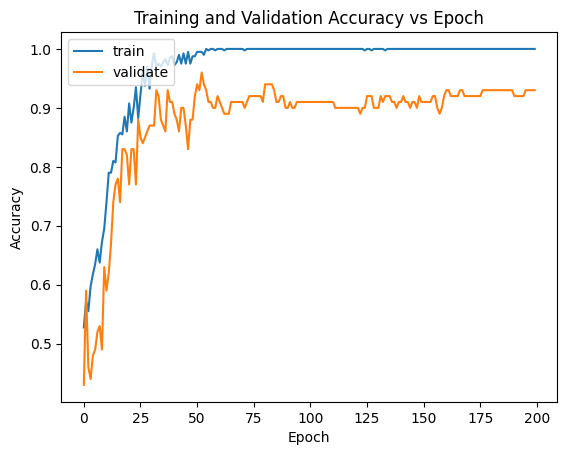

In [ ]:

def CNN_network_identity():
    model = Sequential()

    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

    model.add(Conv2D(256,(10,10),activation='relu'))

    model.add(Dropout(0.30))

    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

    model.add(Conv2D(256,(3,3),activation='relu'))

    model.add(Dropout(0.30))

    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

    model.add(Conv2D(128,(3,3),activation='relu'))

    model.add(Dropout(0.30))

    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

    model.add(Flatten())

    model.add(Dense(100,activation='relu',kernel_initializer='normal'))

    model.add(Dense(100,activation='relu',kernel_initializer='normal'))

    model.add(Dense(2,activation='softmax'))

    return model

#Create instance of CNN model graph
CNN_network_identity = CNN_network_identity()

#Compile model using an appropriate loss and optimizer algorithm
CNN_network_identity.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#Train the model
history = CNN_network_identity.fit(data_train_scrambled_not_scrambled,data_train_scrambled_not_scrambled_lables,validation_data=(data_validation_scrambled_not_scrambled,data_validation_scrambled_not_scrambled_lables),epochs=200,batch_size=256,shuffle=True)

#Print accuracy of model on testing set after training
scores = CNN_network_identity.evaluate(data_test_scrambled_not_scrambled,data_test_scrambled_not_scrambled_lables)
print("Accuracy:%.2f%%" %(scores[1]*100))


# serialize model to JSON
CNN_network_identity_json = CNN_network_identity.to_json()
with open("Two_visual_pathways_modeling/CNN_network_identity.json", "w") as json_file:
    json_file.write(CNN_network_identity_json)
# serialize weights to HDF5
CNN_network_identity.save_weights("Two_visual_pathways_modeling/CNN_network_identity.h5")
print("Saved model to disk")






#Plot accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validate'],loc='upper left')
plt.show()





# network_space

Epoch 1/200
2/2 [==============================] - 3s 258ms/step - loss: 3.5442 - acc: 0.0675 - val_loss: 3.4131 - val_acc: 0.1600
Epoch 2/200
2/2 [==============================] - 0s 69ms/step - loss: 3.0189 - acc: 0.2225 - val_loss: 2.7571 - val_acc: 0.2200
Epoch 3/200
2/2 [==============================] - 0s 65ms/step - loss: 2.1871 - acc: 0.3450 - val_loss: 2.2916 - val_acc: 0.4100
Epoch 4/200
2/2 [==============================] - 0s 65ms/step - loss: 1.6976 - acc: 0.4275 - val_loss: 1.8156 - val_acc: 0.5100
Epoch 5/200
2/2 [==============================] - 0s 66ms/step - loss: 1.3725 - acc: 0.5375 - val_loss: 1.9208 - val_acc: 0.4500
Epoch 6/200
2/2 [==============================] - 0s 64ms/step - loss: 1.1869 - acc: 0.6250 - val_loss: 1.7617 - val_acc: 0.5400
Epoch 7/200
2/2 [==============================] - 0s 64ms/step - loss: 1.0699 - acc: 0.6075 - val_loss: 1.5654 - val_acc: 0.6300
Epoch 8/200
2/2 [==============================] - 0s 64ms/step - loss: 0.9004 - acc: 0.6

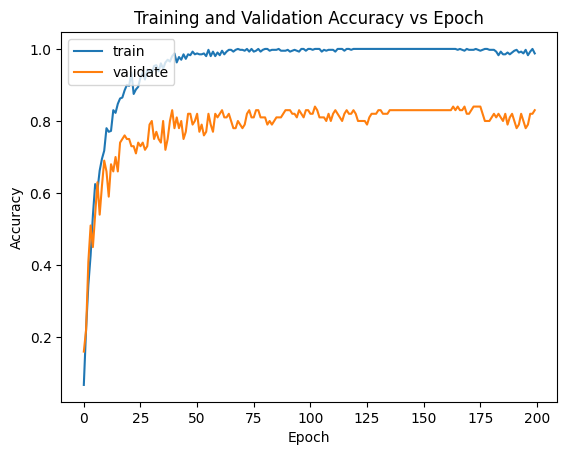

In [ ]:

def CNN_network_space():
    model = Sequential()

    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

    model.add(Conv2D(256,(10,10),activation='relu'))

    model.add(Dropout(0.30))

    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

    model.add(Conv2D(256,(3,3),activation='relu'))

    model.add(Dropout(0.30))

    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

    model.add(Conv2D(128,(3,3),activation='relu'))

    model.add(Dropout(0.30))

    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

    model.add(Flatten())

    model.add(Dense(100,activation='relu',kernel_initializer='normal'))

    model.add(Dense(100,activation='relu',kernel_initializer='normal'))

    model.add(Dense(36,activation='softmax'))

    return model

#Create instance of CNN model graph
CNN_network_space = CNN_network_space()

#Compile model using an appropriate loss and optimizer algorithm
CNN_network_space.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

#Train the model
history = CNN_network_space.fit(data_train_scrambled_not_scrambled,data_train_scrambled_not_scrambled_center_orientation,validation_data=(data_validation_scrambled_not_scrambled,data_validation_scrambled_not_scrambled_center_orientation),epochs=200,batch_size=256,shuffle=True)

#Print accuracy of model on testing set after training
scores = CNN_network_space.evaluate(data_test_scrambled_not_scrambled,data_test_scrambled_not_scrambled_center_orientation)
print("Accuracy:%.2f%%" %(scores[1]*100))


# serialize model to JSON
CNN_network_space_json = CNN_network_space.to_json()
with open("Two_visual_pathways_modeling/CNN_network_space.json", "w") as json_file:
    json_file.write(CNN_network_space_json)
# serialize weights to HDF5
CNN_network_space.save_weights("Two_visual_pathways_modeling/CNN_network_space.h5")
print("Saved model to disk")

#Plot accuracy vs epoch

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validate'],loc='upper left')
plt.show()








# Decoding spatial information from network_identity using a non-linear decoder

In [ ]:

# load json and create model
json_file = open('Two_visual_pathways_modeling/CNN_network_identity.json', 'r')
loaded_CNN_network_json = json_file.read()
json_file.close()
CNN_network1 = keras.models.model_from_json(loaded_CNN_network_json)
# load weights into new model
CNN_network1.load_weights("Two_visual_pathways_modeling/CNN_network_identity.h5")
print("Loaded model 1 from disk")


network1_layer_activations_train = np.zeros((int((2/3)*data_size),100))
network1_layer_activations_validation = np.zeros((int((1/6)*data_size),100))
network1_layer_activations_test = np.zeros((int((1/6)*data_size),100))





for i in range(int((2/3)*data_size)):

  layer_outputs = [layer.output for layer in CNN_network1.layers[-2:-1]]
  activation_model = keras.Model(inputs=CNN_network1.input, outputs=layer_outputs)
  activations = activation_model.predict(np.reshape(data_train_scrambled_not_scrambled[i,:,:,:],[1,140,140,1]))
  network1_layer_activations_train[i,:] = np.asarray(activations)

for i in range(int((1/6)*data_size)):

  layer_outputs = [layer.output for layer in CNN_network1.layers[-2:-1]]
  activation_model = keras.Model(inputs=CNN_network1.input, outputs=layer_outputs)
  activations = activation_model.predict(np.reshape(data_validation_scrambled_not_scrambled[i,:,:,:],[1,140,140,1]))
  network1_layer_activations_validation[i,:] = np.asarray(activations)


for i in range(int((1/6)*data_size)):

  layer_outputs = [layer.output for layer in CNN_network1.layers[-2:-1]]
  activation_model = keras.Model(inputs=CNN_network1.input, outputs=layer_outputs)
  activations = activation_model.predict(np.reshape(data_test_scrambled_not_scrambled[i,:,:,:],[1,140,140,1]))
  network1_layer_activations_test[i,:] = np.asarray(activations)





Loaded model 1 from disk
1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 88ms/step


In [ ]:

def write_data_into_h5_file(dest_filepath, filepaths_list, validation_layer_activations0, test_layer_activations0):

    data_shape = (filepaths_list.shape[0],100)
    data_shape2 = (num_valid,100)
    data_shape3 = (num_test,100)

    dataset_name1 = "train_layer_activations"
    dataset_name2 = "validation_layer_activations"
    dataset_name3 = "test_layer_activations"

    with h5py.File(dest_filepath, 'a') as f:

        f.create_dataset(dataset_name1, data_shape, np.float32)
        f.create_dataset(dataset_name2, data_shape2, np.float32)
        f.create_dataset(dataset_name3, data_shape3, np.float32)

        for i in range(filepaths_list.shape[0]):

            train_layer_activations = filepaths_list[i,:]
            f[dataset_name1][i, ...] = train_layer_activations[None]
        for i in range(num_test):
            validation_layer_activations = validation_layer_activations0[i,:]
            test_layer_activations = test_layer_activations0[i,:]
            f[dataset_name2][i, ...] = validation_layer_activations[None]
            f[dataset_name3][i, ...] = test_layer_activations[None]

write_data_into_h5_file('Two_visual_pathways_modeling/network_identity_activations_600samples_id_loc_orientation', network1_layer_activations_train, network1_layer_activations_validation, network1_layer_activations_test)


Epoch 1/200
2/2 [==============================] - 2s 190ms/step - loss: 3.5795 - acc: 0.0425 - val_loss: 3.5347 - val_acc: 0.1000
Epoch 2/200
2/2 [==============================] - 0s 32ms/step - loss: 3.5071 - acc: 0.0700 - val_loss: 3.4874 - val_acc: 0.0700
Epoch 3/200
2/2 [==============================] - 0s 31ms/step - loss: 3.4437 - acc: 0.0925 - val_loss: 3.4320 - val_acc: 0.1000
Epoch 4/200
2/2 [==============================] - 0s 33ms/step - loss: 3.3741 - acc: 0.1350 - val_loss: 3.3641 - val_acc: 0.1500
Epoch 5/200
2/2 [==============================] - 0s 33ms/step - loss: 3.2939 - acc: 0.1925 - val_loss: 3.2867 - val_acc: 0.2600
Epoch 6/200
2/2 [==============================] - 0s 32ms/step - loss: 3.1942 - acc: 0.2675 - val_loss: 3.2002 - val_acc: 0.2300
Epoch 7/200
2/2 [==============================] - 0s 32ms/step - loss: 3.0814 - acc: 0.3300 - val_loss: 3.1052 - val_acc: 0.2400
Epoch 8/200
2/2 [==============================] - 0s 32ms/step - loss: 2.9541 - acc: 0.3

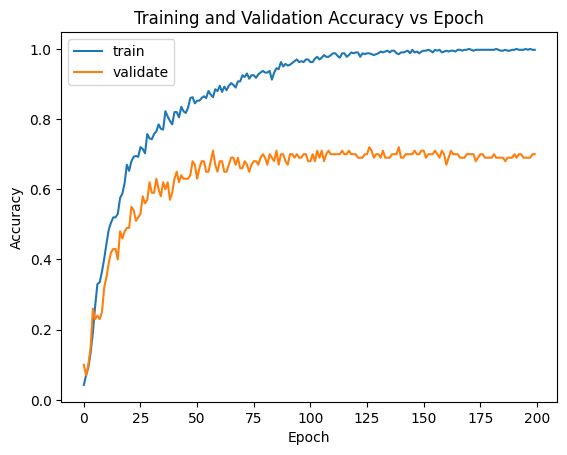

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import h5py

f = h5py.File('Two_visual_pathways_modeling/network_identity_activations_600samples_id_loc_orientation', 'r')

network1_layer_activations_test = np.asarray(f['test_layer_activations'])
network1_layer_activations_train = np.asarray(f['train_layer_activations'])
network1_layer_activations_validation = np.asarray(f['validation_layer_activations'])


#Create and train model architecture
def CNN_network_identity_space():
    model = Sequential()

    model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=100))

    model.add(Dense(100,activation='relu',kernel_initializer='normal'))

    model.add(Dense(100,activation='relu',kernel_initializer='normal'))

    model.add(Dense(36,activation='softmax'))

    return model

#Create instance of CNN model graph
CNN_network_identity_space = CNN_network_identity_space()

#Compile model using an appropriate loss and optimizer algorithm
CNN_network_identity_space.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

#Train the model and assign training meta-data to a variable

history = CNN_network_identity_space.fit(network1_layer_activations_train,data_train_scrambled_not_scrambled_center_orientation,validation_data=(network1_layer_activations_validation,data_validation_scrambled_not_scrambled_center_orientation),epochs=200,batch_size=256,shuffle=True)

#Print accuracy of model on testing set after training

scores = CNN_network_identity_space.evaluate(network1_layer_activations_test,data_test_scrambled_not_scrambled_center_orientation)
print("Accuracy:%.2f%%" %(scores[1]*100))

#Plot accuracy vs epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validate'],loc='upper left')
plt.show()





# Decoding spatial information from network_untrained using a non-linear decoder

In [ ]:

# load json and create model
json_file = open('Two_visual_pathways_modeling/CNN_network_untrained.json', 'r')
loaded_CNN_network_json = json_file.read()
json_file.close()
CNN_network1 = keras.models.model_from_json(loaded_CNN_network_json)
# load weights into new model
CNN_network1.load_weights("Two_visual_pathways_modeling/CNN_network_untrained.h5")
print("Loaded model 1 from disk")


network1_layer_activations_train = np.zeros((int((2/3)*data_size),100))
network1_layer_activations_validation = np.zeros((int((1/6)*data_size),100))
network1_layer_activations_test = np.zeros((int((1/6)*data_size),100))





for i in range(int((2/3)*data_size)):

  layer_outputs = [layer.output for layer in CNN_network1.layers[-2:-1]]
  activation_model = keras.Model(inputs=CNN_network1.input, outputs=layer_outputs)
  activations = activation_model.predict(np.reshape(data_train_scrambled_not_scrambled[i,:,:,:],[1,140,140,1]))
  network1_layer_activations_train[i,:] = np.asarray(activations)

for i in range(int((1/6)*data_size)):

  layer_outputs = [layer.output for layer in CNN_network1.layers[-2:-1]]
  activation_model = keras.Model(inputs=CNN_network1.input, outputs=layer_outputs)
  activations = activation_model.predict(np.reshape(data_validation_scrambled_not_scrambled[i,:,:,:],[1,140,140,1]))
  network1_layer_activations_validation[i,:] = np.asarray(activations)


for i in range(int((1/6)*data_size)):

  layer_outputs = [layer.output for layer in CNN_network1.layers[-2:-1]]
  activation_model = keras.Model(inputs=CNN_network1.input, outputs=layer_outputs)
  activations = activation_model.predict(np.reshape(data_test_scrambled_not_scrambled[i,:,:,:],[1,140,140,1]))
  network1_layer_activations_test[i,:] = np.asarray(activations)



Loaded model 1 from disk
1/1 [==============================] - 0s 80ms/step


In [ ]:

def write_data_into_h5_file(dest_filepath, filepaths_list, validation_layer_activations0, test_layer_activations0):

    data_shape = (filepaths_list.shape[0],100)
    data_shape2 = (num_valid,100)
    data_shape3 = (num_test,100)

    dataset_name1 = "train_layer_activations"
    dataset_name2 = "validation_layer_activations"
    dataset_name3 = "test_layer_activations"

    with h5py.File(dest_filepath, 'a') as f:

        f.create_dataset(dataset_name1, data_shape, np.float32)
        f.create_dataset(dataset_name2, data_shape2, np.float32)
        f.create_dataset(dataset_name3, data_shape3, np.float32)

        for i in range(filepaths_list.shape[0]):

            train_layer_activations = filepaths_list[i,:]
            f[dataset_name1][i, ...] = train_layer_activations[None]
        for i in range(num_test):
            validation_layer_activations = validation_layer_activations0[i,:]
            test_layer_activations = test_layer_activations0[i,:]
            f[dataset_name2][i, ...] = validation_layer_activations[None]
            f[dataset_name3][i, ...] = test_layer_activations[None]

write_data_into_h5_file('Two_visual_pathways_modeling/network_untrained_activations_600samples_id_loc_orientation', network1_layer_activations_train, network1_layer_activations_validation, network1_layer_activations_test)


Epoch 1/200
2/2 [==============================] - 2s 185ms/step - loss: 3.5835 - acc: 0.0450 - val_loss: 3.5830 - val_acc: 0.0100
Epoch 2/200
2/2 [==============================] - 0s 31ms/step - loss: 3.5823 - acc: 0.0425 - val_loss: 3.5825 - val_acc: 0.0100
Epoch 3/200
2/2 [==============================] - 0s 31ms/step - loss: 3.5813 - acc: 0.0425 - val_loss: 3.5820 - val_acc: 0.0100
Epoch 4/200
2/2 [==============================] - 0s 31ms/step - loss: 3.5803 - acc: 0.0425 - val_loss: 3.5813 - val_acc: 0.0100
Epoch 5/200
2/2 [==============================] - 0s 30ms/step - loss: 3.5791 - acc: 0.0425 - val_loss: 3.5808 - val_acc: 0.0100
Epoch 6/200
2/2 [==============================] - 0s 31ms/step - loss: 3.5778 - acc: 0.0425 - val_loss: 3.5801 - val_acc: 0.0100
Epoch 7/200
2/2 [==============================] - 0s 31ms/step - loss: 3.5763 - acc: 0.0425 - val_loss: 3.5791 - val_acc: 0.0100
Epoch 8/200
2/2 [==============================] - 0s 32ms/step - loss: 3.5746 - acc: 0.0

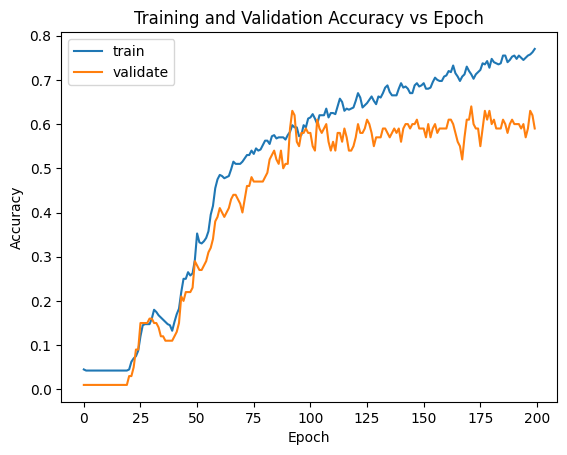

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import h5py

f = h5py.File('Two_visual_pathways_modeling/network_untrained_activations_600samples_id_loc_orientation', 'r')

network1_layer_activations_test = np.asarray(f['test_layer_activations'])
network1_layer_activations_train = np.asarray(f['train_layer_activations'])
network1_layer_activations_validation = np.asarray(f['validation_layer_activations'])


#Create and train model architecture
def CNN_network_identity_space():
    model = Sequential()

    model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=100))

    model.add(Dense(100,activation='relu',kernel_initializer='normal'))

    model.add(Dense(100,activation='relu',kernel_initializer='normal'))

    model.add(Dense(36,activation='softmax'))

    return model

#Create instance of CNN model graph
CNN_network_identity_space = CNN_network_identity_space()

#Compile model using an appropriate loss and optimizer algorithm
CNN_network_identity_space.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

#Train the model and assign training meta-data to a variable

history = CNN_network_identity_space.fit(network1_layer_activations_train,data_train_scrambled_not_scrambled_center_orientation,validation_data=(network1_layer_activations_validation,data_validation_scrambled_not_scrambled_center_orientation),epochs=200,batch_size=256,shuffle=True)

#Print accuracy of model on testing set after training

scores = CNN_network_identity_space.evaluate(network1_layer_activations_test,data_test_scrambled_not_scrambled_center_orientation)
print("Accuracy:%.2f%%" %(scores[1]*100))

#Plot accuracy vs epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validate'],loc='upper left')
plt.show()





# Decoding identity information from network_space using a non-linear decoder

In [ ]:

# load json and create model
json_file = open('Two_visual_pathways_modeling/CNN_network_space.json', 'r')
loaded_CNN_network_json = json_file.read()
json_file.close()
CNN_network1 = keras.models.model_from_json(loaded_CNN_network_json)
# load weights into new model
CNN_network1.load_weights("Two_visual_pathways_modeling/CNN_network_space.h5")
print("Loaded model 1 from disk")


network1_layer_activations_train = np.zeros((int((2/3)*data_size),100))
network1_layer_activations_validation = np.zeros((int((1/6)*data_size),100))
network1_layer_activations_test = np.zeros((int((1/6)*data_size),100))





for i in range(int((2/3)*data_size)):

  layer_outputs = [layer.output for layer in CNN_network1.layers[-2:-1]]
  activation_model = keras.Model(inputs=CNN_network1.input, outputs=layer_outputs)
  activations = activation_model.predict(np.reshape(data_train_scrambled_not_scrambled[i,:,:,:],[1,140,140,1]))
  network1_layer_activations_train[i,:] = np.asarray(activations)

for i in range(int((1/6)*data_size)):

  layer_outputs = [layer.output for layer in CNN_network1.layers[-2:-1]]
  activation_model = keras.Model(inputs=CNN_network1.input, outputs=layer_outputs)
  activations = activation_model.predict(np.reshape(data_validation_scrambled_not_scrambled[i,:,:,:],[1,140,140,1]))
  network1_layer_activations_validation[i,:] = np.asarray(activations)


for i in range(int((1/6)*data_size)):

  layer_outputs = [layer.output for layer in CNN_network1.layers[-2:-1]]
  activation_model = keras.Model(inputs=CNN_network1.input, outputs=layer_outputs)
  activations = activation_model.predict(np.reshape(data_test_scrambled_not_scrambled[i,:,:,:],[1,140,140,1]))
  network1_layer_activations_test[i,:] = np.asarray(activations)





Loaded model 1 from disk
1/1 [==============================] - 0s 93ms/step


In [ ]:

def write_data_into_h5_file(dest_filepath, filepaths_list, validation_layer_activations0, test_layer_activations0):

    data_shape = (filepaths_list.shape[0],100)
    data_shape2 = (num_valid,100)
    data_shape3 = (num_test,100)

    dataset_name1 = "train_layer_activations"
    dataset_name2 = "validation_layer_activations"
    dataset_name3 = "test_layer_activations"

    with h5py.File(dest_filepath, 'a') as f:

        f.create_dataset(dataset_name1, data_shape, np.float32)
        f.create_dataset(dataset_name2, data_shape2, np.float32)
        f.create_dataset(dataset_name3, data_shape3, np.float32)

        for i in range(filepaths_list.shape[0]):

            train_layer_activations = filepaths_list[i,:]
            f[dataset_name1][i, ...] = train_layer_activations[None]
        for i in range(num_test):
            validation_layer_activations = validation_layer_activations0[i,:]
            test_layer_activations = test_layer_activations0[i,:]
            f[dataset_name2][i, ...] = validation_layer_activations[None]
            f[dataset_name3][i, ...] = test_layer_activations[None]

write_data_into_h5_file('Two_visual_pathways_modeling/network_space_activations_600samples_id_loc_orientation', network1_layer_activations_train, network1_layer_activations_validation, network1_layer_activations_test)


Epoch 1/200
2/2 [==============================] - 2s 199ms/step - loss: 0.7012 - acc: 0.5175 - val_loss: 0.6695 - val_acc: 0.6000
Epoch 2/200
2/2 [==============================] - 0s 33ms/step - loss: 0.6894 - acc: 0.5375 - val_loss: 0.6702 - val_acc: 0.6200
Epoch 3/200
2/2 [==============================] - 0s 32ms/step - loss: 0.6718 - acc: 0.5875 - val_loss: 0.6929 - val_acc: 0.5200
Epoch 4/200
2/2 [==============================] - 0s 32ms/step - loss: 0.6557 - acc: 0.6275 - val_loss: 0.7100 - val_acc: 0.4700
Epoch 5/200
2/2 [==============================] - 0s 33ms/step - loss: 0.6488 - acc: 0.6100 - val_loss: 0.7052 - val_acc: 0.4700
Epoch 6/200
2/2 [==============================] - 0s 32ms/step - loss: 0.6380 - acc: 0.6250 - val_loss: 0.6903 - val_acc: 0.5300
Epoch 7/200
2/2 [==============================] - 0s 31ms/step - loss: 0.6256 - acc: 0.6550 - val_loss: 0.6753 - val_acc: 0.5300
Epoch 8/200
2/2 [==============================] - 0s 31ms/step - loss: 0.6208 - acc: 0.6

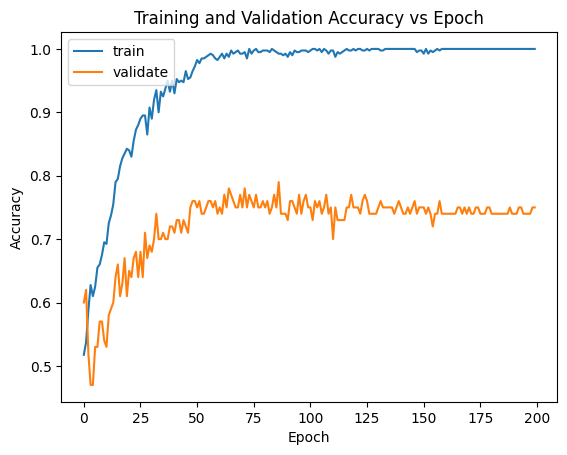

In [ ]:

f = h5py.File('Two_visual_pathways_modeling/network_space_activations_600samples_id_loc_orientation', 'r')

network1_layer_activations_test = np.asarray(f['test_layer_activations'])
network1_layer_activations_train = np.asarray(f['train_layer_activations'])
network1_layer_activations_validation = np.asarray(f['validation_layer_activations'])


def CNN_space_identity():
    model = Sequential()

    model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=100))

    model.add(Dense(100,activation='relu',kernel_initializer='normal'))

    model.add(Dense(100,activation='relu',kernel_initializer='normal'))

    model.add(Dense(2,activation='softmax'))

    return model

#Create instance of CNN model graph
CNN_space_identity = CNN_space_identity()

#Compile model using an appropriate loss and optimizer algorithm

CNN_space_identity.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

#Train the model
history = CNN_space_identity.fit(network1_layer_activations_train,data_train_scrambled_not_scrambled_lables,validation_data=(network1_layer_activations_validation,data_validation_scrambled_not_scrambled_lables),epochs=200,batch_size=256,shuffle=True)

#Print accuracy of model on testing set after training
scores = CNN_space_identity.evaluate(network1_layer_activations_test,data_test_scrambled_not_scrambled_lables)
print("Accuracy:%.2f%%" %(scores[1]*100))

#Plot accuracy vs epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validate'],loc='upper left')
plt.show()


# Decoding spatial information from network_untrained using a non-linear decoder

Epoch 1/200
2/2 [==============================] - 2s 199ms/step - loss: 0.6931 - acc: 0.5150 - val_loss: 0.6942 - val_acc: 0.4200
Epoch 2/200
2/2 [==============================] - 0s 35ms/step - loss: 0.6927 - acc: 0.5200 - val_loss: 0.6953 - val_acc: 0.4200
Epoch 3/200
2/2 [==============================] - 0s 32ms/step - loss: 0.6923 - acc: 0.5200 - val_loss: 0.6962 - val_acc: 0.4200
Epoch 4/200
2/2 [==============================] - 0s 33ms/step - loss: 0.6919 - acc: 0.5200 - val_loss: 0.6970 - val_acc: 0.4200
Epoch 5/200
2/2 [==============================] - 0s 34ms/step - loss: 0.6915 - acc: 0.5200 - val_loss: 0.6975 - val_acc: 0.4200
Epoch 6/200
2/2 [==============================] - 0s 33ms/step - loss: 0.6910 - acc: 0.5200 - val_loss: 0.6984 - val_acc: 0.4200
Epoch 7/200
2/2 [==============================] - 0s 33ms/step - loss: 0.6904 - acc: 0.5200 - val_loss: 0.6990 - val_acc: 0.4200
Epoch 8/200
2/2 [==============================] - 0s 36ms/step - loss: 0.6897 - acc: 0.5

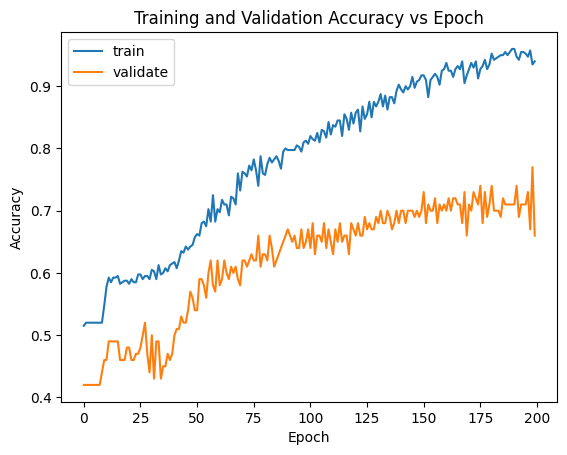

In [ ]:

f = h5py.File('Two_visual_pathways_modeling/network_untrained_activations_600samples_id_loc_orientation', 'r')

network1_layer_activations_test = np.asarray(f['test_layer_activations'])
network1_layer_activations_train = np.asarray(f['train_layer_activations'])
network1_layer_activations_validation = np.asarray(f['validation_layer_activations'])


def CNN_space_identity():
    model = Sequential()

    model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=100))

    model.add(Dense(100,activation='relu',kernel_initializer='normal'))

    model.add(Dense(100,activation='relu',kernel_initializer='normal'))

    model.add(Dense(2,activation='softmax'))

    return model

#Create instance of CNN model graph
CNN_space_identity = CNN_space_identity()

#Compile model using an appropriate loss and optimizer algorithm

CNN_space_identity.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

#Train the model
history = CNN_space_identity.fit(network1_layer_activations_train,data_train_scrambled_not_scrambled_lables,validation_data=(network1_layer_activations_validation,data_validation_scrambled_not_scrambled_lables),epochs=200,batch_size=256,shuffle=True)

#Print accuracy of model on testing set after training
scores = CNN_space_identity.evaluate(network1_layer_activations_test,data_test_scrambled_not_scrambled_lables)
print("Accuracy:%.2f%%" %(scores[1]*100))

#Plot accuracy vs epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validate'],loc='upper left')
plt.show()


# Decoding spatial information from network_identity using a linear decoder

In [ ]:

f = h5py.File('Two_visual_pathways_modeling/network_identity_activations_600samples_id_loc_orientation', 'r')

network1_layer_activations_test = np.asarray(f['test_layer_activations'])
network1_layer_activations_train = np.asarray(f['train_layer_activations'])
network1_layer_activations_validation = np.asarray(f['validation_layer_activations'])

data_train_scrambled_not_scrambled_center_orientation_int = np.argmax(data_train_scrambled_not_scrambled_center_orientation, axis=1)
data_validation_scrambled_not_scrambled_center_orientation_int = np.argmax(data_validation_scrambled_not_scrambled_center_orientation, axis=1)
data_test_scrambled_not_scrambled_center_orientation_int = np.argmax(data_test_scrambled_not_scrambled_center_orientation, axis=1)

activations = np.zeros((600,100))
y = np.zeros(600)
i = 0
for i1 in range(400):
  activations[i] = network1_layer_activations_train[i1,:]
  y[i] = data_train_scrambled_not_scrambled_center_orientation_int[i1]
  i = i + 1
for i2 in range(100):
  activations[i] = network1_layer_activations_validation[i2,:]
  y[i] = data_validation_scrambled_not_scrambled_center_orientation_int[i2]
  i = i + 1
for i3 in range(100):
  activations[i] = network1_layer_activations_test[i3,:]
  y[i] = data_test_scrambled_not_scrambled_center_orientation_int[i3]
  i = i + 1

index = np.random.permutation(600)
p_activations = np.zeros((600,100))
p_y = np.zeros(600)
for i in range(600):
  p_activations[i,:] = activations[index[i],:]
  p_y[i] = y[index[i]]

network1_layer_activations_train = p_activations[0:400,:]
network1_layer_activations_validation = p_activations[400:500,:]
network1_layer_activations_test = p_activations[500:600,:]
data_train_scrambled_not_scrambled_center_orientation_int = p_y[0:400]
data_validation_scrambled_not_scrambled_center_orientation_int = p_y[400:500]
data_test_scrambled_not_scrambled_center_orientation_int = p_y[500:600]


clf = SVC(kernel='linear',C=1)

clf.fit(network1_layer_activations_train,data_train_scrambled_not_scrambled_center_orientation_int)

predictions = clf.predict(network1_layer_activations_test)

count = 0
for i in range(100):
  if predictions[i] == data_test_scrambled_not_scrambled_center_orientation_int[i]:
    count = count + 1

accuracy = count/100
print(accuracy)





0.79


# Decoding spatial information from network_untrained using a linear decoder

In [ ]:

f = h5py.File('Two_visual_pathways_modeling/network_untrained_activations_600samples_id_loc_orientation', 'r')

network1_layer_activations_test = np.asarray(f['test_layer_activations'])
network1_layer_activations_train = np.asarray(f['train_layer_activations'])
network1_layer_activations_validation = np.asarray(f['validation_layer_activations'])

data_train_scrambled_not_scrambled_center_orientation_int = np.argmax(data_train_scrambled_not_scrambled_center_orientation, axis=1)
data_validation_scrambled_not_scrambled_center_orientation_int = np.argmax(data_validation_scrambled_not_scrambled_center_orientation, axis=1)
data_test_scrambled_not_scrambled_center_orientation_int = np.argmax(data_test_scrambled_not_scrambled_center_orientation, axis=1)

activations = np.zeros((600,100))
y = np.zeros(600)
i = 0
for i1 in range(400):
  activations[i] = network1_layer_activations_train[i1,:]
  y[i] = data_train_scrambled_not_scrambled_center_orientation_int[i1]
  i = i + 1
for i2 in range(100):
  activations[i] = network1_layer_activations_validation[i2,:]
  y[i] = data_validation_scrambled_not_scrambled_center_orientation_int[i2]
  i = i + 1
for i3 in range(100):
  activations[i] = network1_layer_activations_test[i3,:]
  y[i] = data_test_scrambled_not_scrambled_center_orientation_int[i3]
  i = i + 1

index = np.random.permutation(600)
p_activations = np.zeros((600,100))
p_y = np.zeros(600)
for i in range(600):
  p_activations[i,:] = activations[index[i],:]
  p_y[i] = y[index[i]]

network1_layer_activations_train = p_activations[0:400,:]
network1_layer_activations_validation = p_activations[400:500,:]
network1_layer_activations_test = p_activations[500:600,:]
data_train_scrambled_not_scrambled_center_orientation_int = p_y[0:400]
data_validation_scrambled_not_scrambled_center_orientation_int = p_y[400:500]
data_test_scrambled_not_scrambled_center_orientation_int = p_y[500:600]


clf = SVC(kernel='linear',C=1)

clf.fit(network1_layer_activations_train,data_train_scrambled_not_scrambled_center_orientation_int)

predictions = clf.predict(network1_layer_activations_test)

count = 0
for i in range(100):
  if predictions[i] == data_test_scrambled_not_scrambled_center_orientation_int[i]:
    count = count + 1

accuracy = count/100
print(accuracy)





0.01


# Decoding identity information from network_space using a linear decoder

In [ ]:

f = h5py.File('Two_visual_pathways_modeling/network_space_activations_600samples_id_loc_orientation', 'r')

network1_layer_activations_test = np.asarray(f['test_layer_activations'])
network1_layer_activations_train = np.asarray(f['train_layer_activations'])
network1_layer_activations_validation = np.asarray(f['validation_layer_activations'])

data_train_scrambled_not_scrambled_lables_int = np.argmax(data_train_scrambled_not_scrambled_lables, axis=1)
data_validation_scrambled_not_scrambled_lables_int = np.argmax(data_validation_scrambled_not_scrambled_lables, axis=1)
data_test_scrambled_not_scrambled_lables_int = np.argmax(data_test_scrambled_not_scrambled_lables, axis=1)

activations = np.zeros((600,100))
y = np.zeros(600)
i = 0
for i1 in range(400):
  activations[i] = network1_layer_activations_train[i1,:]
  y[i] = data_train_scrambled_not_scrambled_lables_int[i1]
  i = i + 1
for i2 in range(100):
  activations[i] = network1_layer_activations_validation[i2,:]
  y[i] = data_validation_scrambled_not_scrambled_lables_int[i2]
  i = i + 1
for i3 in range(100):
  activations[i] = network1_layer_activations_test[i3,:]
  y[i] = data_test_scrambled_not_scrambled_lables_int[i3]
  i = i + 1

index = np.random.permutation(600)
p_activations = np.zeros((600,100))
p_y = np.zeros(600)
for i in range(600):
  p_activations[i,:] = activations[index[i],:]
  p_y[i] = y[index[i]]

network1_layer_activations_train = p_activations[0:400,:]
network1_layer_activations_validation = p_activations[400:500,:]
network1_layer_activations_test = p_activations[500:600,:]
data_train_scrambled_not_scrambled_lables_int = p_y[0:400]
data_validation_scrambled_not_scrambled_lables_int = p_y[400:500]
data_test_scrambled_not_scrambled_lables_int = p_y[500:600]

clf = SVC(kernel='linear',C=1)

clf.fit(network1_layer_activations_train,data_train_scrambled_not_scrambled_lables_int)

predictions = clf.predict(network1_layer_activations_test)

count = 0
for i in range(100):
  if predictions[i] == data_test_scrambled_not_scrambled_lables_int[i]:
    count = count + 1

accuracy = count/100
print(accuracy)



0.66


# Decoding identity information from network_untrained using a linear decoder

In [ ]:

f = h5py.File('Two_visual_pathways_modeling/network_untrained_activations_600samples_id_loc_orientation', 'r')

network1_layer_activations_test = np.asarray(f['test_layer_activations'])
network1_layer_activations_train = np.asarray(f['train_layer_activations'])
network1_layer_activations_validation = np.asarray(f['validation_layer_activations'])

data_train_scrambled_not_scrambled_lables_int = np.argmax(data_train_scrambled_not_scrambled_lables, axis=1)
data_validation_scrambled_not_scrambled_lables_int = np.argmax(data_validation_scrambled_not_scrambled_lables, axis=1)
data_test_scrambled_not_scrambled_lables_int = np.argmax(data_test_scrambled_not_scrambled_lables, axis=1)

activations = np.zeros((600,100))
y = np.zeros(600)
i = 0
for i1 in range(400):
  activations[i] = network1_layer_activations_train[i1,:]
  y[i] = data_train_scrambled_not_scrambled_lables_int[i1]
  i = i + 1
for i2 in range(100):
  activations[i] = network1_layer_activations_validation[i2,:]
  y[i] = data_validation_scrambled_not_scrambled_lables_int[i2]
  i = i + 1
for i3 in range(100):
  activations[i] = network1_layer_activations_test[i3,:]
  y[i] = data_test_scrambled_not_scrambled_lables_int[i3]
  i = i + 1

index = np.random.permutation(600)
p_activations = np.zeros((600,100))
p_y = np.zeros(600)
for i in range(600):
  p_activations[i,:] = activations[index[i],:]
  p_y[i] = y[index[i]]

network1_layer_activations_train = p_activations[0:400,:]
network1_layer_activations_validation = p_activations[400:500,:]
network1_layer_activations_test = p_activations[500:600,:]
data_train_scrambled_not_scrambled_lables_int = p_y[0:400]
data_validation_scrambled_not_scrambled_lables_int = p_y[400:500]
data_test_scrambled_not_scrambled_lables_int = p_y[500:600]

clf = SVC(kernel='linear',C=1)

clf.fit(network1_layer_activations_train,data_train_scrambled_not_scrambled_lables_int)

predictions = clf.predict(network1_layer_activations_test)

count = 0
for i in range(100):
  if predictions[i] == data_test_scrambled_not_scrambled_lables_int[i]:
    count = count + 1

accuracy = count/100
print(accuracy)

0.45


# network_two_pathways

Epoch 1/200
2/2 [==============================] - 2s 228ms/step - loss: 4.2448 - acc: 0.0150 - val_loss: 4.1987 - val_acc: 0.0500
Epoch 2/200
2/2 [==============================] - 0s 41ms/step - loss: 4.1302 - acc: 0.0650 - val_loss: 4.1303 - val_acc: 0.0700
Epoch 3/200
2/2 [==============================] - 0s 41ms/step - loss: 4.0200 - acc: 0.0850 - val_loss: 4.0498 - val_acc: 0.1000
Epoch 4/200
2/2 [==============================] - 0s 40ms/step - loss: 3.8895 - acc: 0.1675 - val_loss: 3.9543 - val_acc: 0.1400
Epoch 5/200
2/2 [==============================] - 0s 39ms/step - loss: 3.7347 - acc: 0.2450 - val_loss: 3.8416 - val_acc: 0.1600
Epoch 6/200
2/2 [==============================] - 0s 41ms/step - loss: 3.5517 - acc: 0.2875 - val_loss: 3.7170 - val_acc: 0.2000
Epoch 7/200
2/2 [==============================] - 0s 40ms/step - loss: 3.3496 - acc: 0.3175 - val_loss: 3.5791 - val_acc: 0.1900
Epoch 8/200
2/2 [==============================] - 0s 39ms/step - loss: 3.1185 - acc: 0.3

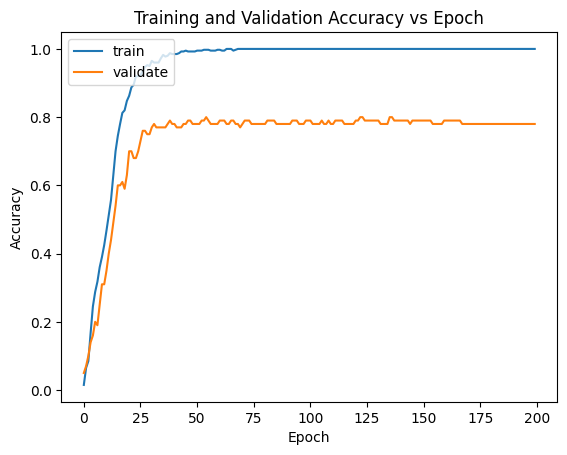

In [ ]:

f = h5py.File('Two_visual_pathways_modeling/network_identity_activations_600samples_id_loc_orientation', 'r')

network1_layer_activations_test = np.asarray(f['test_layer_activations'])
network1_layer_activations_train = np.asarray(f['train_layer_activations'])
network1_layer_activations_validation = np.asarray(f['validation_layer_activations'])

f = h5py.File('Two_visual_pathways_modeling/network_space_activations_600samples_id_loc_orientation', 'r')

network2_layer_activations_test = np.asarray(f['test_layer_activations'])
network2_layer_activations_train = np.asarray(f['train_layer_activations'])
network2_layer_activations_validation = np.asarray(f['validation_layer_activations'])

combined_activation_train = np.concatenate((network1_layer_activations_train, network2_layer_activations_train),axis=1)
combined_activation_test = np.concatenate((network1_layer_activations_test, network2_layer_activations_test),axis=1)
combined_activation_validation = np.concatenate((network1_layer_activations_validation, network2_layer_activations_validation),axis=1)

identity_labels = np.argmax(data_train_scrambled_not_scrambled_lables,axis=1)
space_labels = np.argmax(data_train_scrambled_not_scrambled_center_orientation,axis=1)
identity_and_space_labels_train = space_labels + identity_labels*36
identity_and_space_labels_train = keras.utils.np_utils.to_categorical(identity_and_space_labels_train, num_classes=72)

identity_labels = np.argmax(data_validation_scrambled_not_scrambled_lables,axis=1)
space_labels = np.argmax(data_validation_scrambled_not_scrambled_center_orientation,axis=1)
identity_and_space_labels_validate = space_labels + identity_labels*36
identity_and_space_labels_validate = keras.utils.np_utils.to_categorical(identity_and_space_labels_validate, num_classes=72)

identity_labels = np.argmax(data_test_scrambled_not_scrambled_lables,axis=1)
space_labels = np.argmax(data_test_scrambled_not_scrambled_center_orientation,axis=1)
identity_and_space_labels_test = space_labels + identity_labels*36
identity_and_space_labels_test = keras.utils.np_utils.to_categorical(identity_and_space_labels_test, num_classes=72)


def CNN_network_combine_identity_and_space():
    model = Sequential()

    model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=200))

    model.add(Dense(100,activation='relu',kernel_initializer='normal'))

    model.add(Dense(100,activation='relu',kernel_initializer='normal'))

    model.add(Dense(72,activation='softmax'))

    return model

#Create instance of CNN model graph
CNN_network_combine_identity_and_space = CNN_network_combine_identity_and_space()

#Compile model using an appropriate loss and optimizer algorithm
CNN_network_combine_identity_and_space.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

#Train the model
history = CNN_network_combine_identity_and_space.fit(combined_activation_train,identity_and_space_labels_train,validation_data=(combined_activation_validation,identity_and_space_labels_validate),epochs=200,batch_size=256,shuffle=True)

#Print accuracy of model on testing set after training
scores = CNN_network_combine_identity_and_space.evaluate(combined_activation_test,identity_and_space_labels_test)
print("Accuracy:%.2f%%" %(scores[1]*100))

#Plot accuracy vs epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validate'],loc='upper left')
plt.show()


# 10 trials accuracy with one randomly generated dataset: 74, 76, 75, 77, 75

# network_one_pathway

Epoch 1/400
2/2 [==============================] - 4s 308ms/step - loss: 4.2750 - acc: 0.0125 - val_loss: 4.2624 - val_acc: 0.0300
Epoch 2/400
2/2 [==============================] - 0s 104ms/step - loss: 4.1755 - acc: 0.0425 - val_loss: 4.0550 - val_acc: 0.0500
Epoch 3/400
2/2 [==============================] - 0s 104ms/step - loss: 3.8107 - acc: 0.0900 - val_loss: 3.9630 - val_acc: 0.2000
Epoch 4/400
2/2 [==============================] - 0s 103ms/step - loss: 3.3865 - acc: 0.2000 - val_loss: 3.6508 - val_acc: 0.2000
Epoch 5/400
2/2 [==============================] - 0s 102ms/step - loss: 2.9589 - acc: 0.2725 - val_loss: 3.4454 - val_acc: 0.3200
Epoch 6/400
2/2 [==============================] - 0s 101ms/step - loss: 2.5614 - acc: 0.3375 - val_loss: 3.1549 - val_acc: 0.2800
Epoch 7/400
2/2 [==============================] - 0s 102ms/step - loss: 2.1752 - acc: 0.3750 - val_loss: 2.8558 - val_acc: 0.3200
Epoch 8/400
2/2 [==============================] - 0s 102ms/step - loss: 1.8565 - a

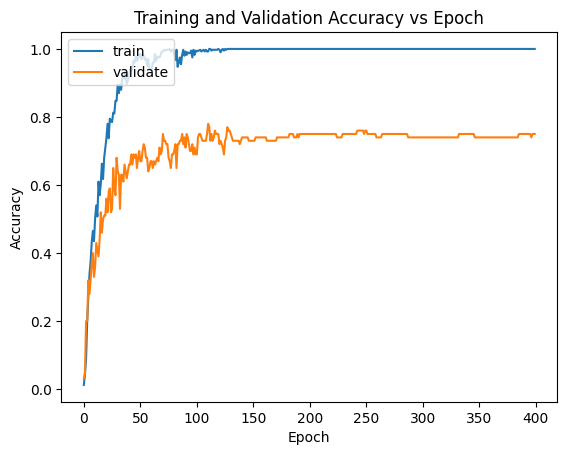

In [ ]:

identity_labels = np.argmax(data_train_scrambled_not_scrambled_lables,axis=1)
space_labels = np.argmax(data_train_scrambled_not_scrambled_center_orientation,axis=1)
identity_and_space_labels_train = space_labels + identity_labels*36
identity_and_space_labels_train = keras.utils.np_utils.to_categorical(identity_and_space_labels_train, num_classes=72)

identity_labels = np.argmax(data_validation_scrambled_not_scrambled_lables,axis=1)
space_labels = np.argmax(data_validation_scrambled_not_scrambled_center_orientation,axis=1)
identity_and_space_labels_validate = space_labels + identity_labels*36
identity_and_space_labels_validate = keras.utils.np_utils.to_categorical(identity_and_space_labels_validate, num_classes=72)

identity_labels = np.argmax(data_test_scrambled_not_scrambled_lables,axis=1)
space_labels = np.argmax(data_test_scrambled_not_scrambled_center_orientation,axis=1)
identity_and_space_labels_test = space_labels + identity_labels*36
identity_and_space_labels_test = keras.utils.np_utils.to_categorical(identity_and_space_labels_test, num_classes=72)




def CNN_network_identity_and_space():
    model = Sequential()

    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

    model.add(Conv2D(512,(10,10),activation='relu'))

    model.add(Dropout(0.30))

    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

    model.add(Conv2D(512,(3,3),activation='relu'))

    model.add(Dropout(0.30))

    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

    model.add(Conv2D(256,(3,3),activation='relu'))

    model.add(Dropout(0.30))

    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

    model.add(Flatten())

    model.add(Dense(200,activation='relu',kernel_initializer='normal'))

    model.add(Dense(200,activation='relu',kernel_initializer='normal'))

    model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=200))

    model.add(Dense(100,activation='relu',kernel_initializer='normal'))

    model.add(Dense(100,activation='relu',kernel_initializer='normal'))

    model.add(Dense(72,activation='softmax'))

    return model

#Create instance of CNN model graph
CNN_network_identity_and_space = CNN_network_identity_and_space()

#Compile model using an appropriate loss and optimizer algorithm
CNN_network_identity_and_space.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

#Train the model and assign training meta-data to a variable
history = CNN_network_identity_and_space.fit(data_train_scrambled_not_scrambled,identity_and_space_labels_train,validation_data=(data_validation_scrambled_not_scrambled,identity_and_space_labels_validate),epochs=400,batch_size=256,shuffle=True)

#Print accuracy of model on testing set after training
scores = CNN_network_identity_and_space.evaluate(data_test_scrambled_not_scrambled,identity_and_space_labels_test)
print("Accuracy:%.2f%%" %(scores[1]*100))




#Plot accuracy vs epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validate'],loc='upper left')
plt.show()


# 10 trials accuracy with one randomly generated dataset: 73, 72, 73, 73, 71